In [ ]:
# Imports
import numpy as np
import plotting_master as pm
import run

# -- Parameters --
number_of_companies = 50
number_of_workers = 5 * number_of_companies 
salary_increase = 0.035
interest_rate_free = 0.0 # "variable" or float
mutation_magnitude = 0.1 # Float, "spread", "last_T"
salary_min = mutation_magnitude * 0.1
prob_exponent = 1
warmup_steps = 3000
time_steps = 500 + warmup_steps 
seed = 532 # np.random.randint(0, 10000)

# Bankruptcy: negative_money, cannot_pay_salary
# mutation: "constant", "spread", "last_T", "minimum", "log", "mean", "worker_opinion", "0_to_mean", "normal", "positive_income"
update_methods = {"worker_update": "limited", 
                  "bankruptcy": "negative_money",
                  "mutation": "positive_income",}


# Create instances
create_data = run.RunWorkForce(number_of_companies, number_of_workers, salary_increase, 
                            interest_rate_free, mutation_magnitude, prob_exponent, salary_min, update_methods, time_steps, seed)
gname = create_data._get_group_name()
plotter = pm.PlotMaster(gname, skip_values=warmup_steps)

### Store values

In [ ]:
create_data.store_data_in_group()

### Density graphs

In [ ]:
plotter.plot_running_KDE(bandwidth_s=0.005, bandwidth_d=0.15, s_lim=(0.08, 0.18), d_lim=(0.001, 2), eval_points=200, kernel="epanechnikov", show_mean=False, plot_debt=False)
# normale bandwidth: 0.0005, 0.15

In [ ]:
plotter.single_KDE(x_data="delta_debt", time_point=70, eval_points=200, bandwidth=0.045, kernel="epanechnikov")

In [ ]:
plotter.plot_mu_mean_s_diversity()

### General behaviour

In [ ]:
plotter.plot_salary(show_spread=False)

In [ ]:
plotter.plot_debt()

In [ ]:
plotter.plot_single_companies(N_plot=6)

In [ ]:
plotter.plot_salary_and_debt_distributions()

### Niche behaviour graphs

In [ ]:
plotter.plot_mutations()

In [ ]:
plotter.plot_bankrupt_new_salary()

In [ ]:
plotter.animate_w0_wnon0(skip_time_steps=5);

In [ ]:
plotter.plot_time_from_income_change_to_bankruptcy_distribution(show_plot=False)

In [ ]:
plotter.plot_survivors(show_peak_plot=False)

In [ ]:
plotter.add_parameter_text_to_plot = False
plotter.add_file_name_to_figure_name = False
plotter.plot_diversity()

### Parameter investigations

In [ ]:
# Create all datasets and store them. Does not store group names
# create_data.repeated_m_runs(N_repeat=2, m_values=np.geomspace(1e-1, 1e1, 3))
create_data.multiple_s_min_runs(s_min_list=np.geomspace(1e-8, 5e-2, 8))

In [2]:
# These should belong to and be imported from a seperate file

# Get group name list
# Mutation size
m_values = [0.1, 0.5, 1, 5, 10, 25, 50, 75, 100]
group_name_list_mutation = []
for m in m_values:
    create_data.mutation_magnitude = m
    create_data.salary_min = m / 10
    group_name_list_mutation.append(create_data._get_group_name())
# Reset m
create_data.mutation_magnitude = mutation_magnitude
create_data.salary_min = salary_min

# Mutation size repeated
N_m_repeat = 10
group_name_list_mutation_arr = np.zeros((len(m_values), N_m_repeat), dtype=object)
seed_arr = np.arange(0, N_m_repeat * len(m_values)).reshape(len(m_values), N_m_repeat)
for i, m in enumerate(m_values):
    for j in range(N_m_repeat):
        create_data._set_seed(seed_arr[i, j])
        create_data.mutation_magnitude = m
        # create_data.salary_min = m / 10
        group_name_list_mutation_arr[i, j] = create_data._get_group_name()
# Reset values
create_data.mutation_magnitude = mutation_magnitude
create_data.salary_min = salary_min
create_data._set_seed(seed=seed)

# Prob exponent
prob_exponent_values = [0, 1, 2, 4, 6, 8]
group_name_list_prob_expo = []
for exponent in prob_exponent_values:
    create_data.prob_exponent = exponent
    group_name_list_prob_expo.append(create_data._get_group_name())
# Reset exponent
create_data.prob_exponent = prob_exponent

# alpha repeated
N_alpha_repeat = 1
group_name_list_alpha_arr = np.zeros((len(prob_exponent_values), N_alpha_repeat), dtype=object)
seed_arr = np.arange(0, N_alpha_repeat * len(prob_exponent_values)).reshape(len(prob_exponent_values), N_alpha_repeat)
for i, alpha in enumerate(prob_exponent_values):
    for j in range(N_alpha_repeat):
        create_data._set_seed(seed_arr[i, j])
        create_data.prob_exponent = alpha
        group_name_list_alpha_arr[i, j] = create_data._get_group_name()
# Reset values
create_data.prob_exponent = prob_exponent
create_data._set_seed(seed=seed)

# ds 
ds_values = np.linspace(0.005, 0.1, 10)
group_name_list_ds = []
for ds in ds_values:
    create_data.ds = ds
    group_name_list_ds.append(create_data._get_group_name())
# Reset ds
create_data.ds = salary_increase


s_min_values = [1e-8, 1e-7, 1e-6, 1e-4, 1e-3, 1e-2]
group_name_list_salary_min = []
for s_min in s_min_values:
    create_data.salary_min = s_min
    group_name_list_salary_min.append(create_data._get_group_name())
# Reset salary_min
create_data.salary_min = salary_min

# N variable, W const
NW_const = 250
NW_variable = np.array([25, 50, 100, 250, 500, 1000])

# Ratio constant N / W
N_W_ratio = 0.75
W_values_ratio = np.round(N_W_ratio * NW_variable, 0).astype(np.int32)

group_name_list_N_var_W_const = []
group_name_list_N_const_W_var = []
group_name_list_N_W_ratio = []

# Run N variable, W constant
create_data.W = NW_const
for N in NW_variable:
    create_data.N = N
    group_name_list_N_var_W_const.append(create_data._get_group_name())

# Run N constant, W variable
create_data.N = NW_const
for W in NW_variable:
    create_data.W = W
    group_name_list_N_const_W_var.append(create_data._get_group_name())

# Run N / W ratio
for N, W in zip(NW_variable, W_values_ratio):
    create_data.N = N
    create_data.W = W
    group_name_list_N_W_ratio.append(create_data._get_group_name())
    
# Reset N and W
create_data.N = number_of_companies
create_data.W = number_of_workers

In [3]:
# # Store data
# for m in m_values:
#     print("m = ", m)
#     create_data.mutation_magnitude = m
#     # create_data.salary_min = m / 10
#     create_data.store_data_in_group()
# create_data.mutation_magnitude = mutation_magnitude
# create_data.salary_min = salary_min

# Store multiple m data
# for i, m in enumerate(m_values):
#     for j in range(N_m_repeat):
#         print("m = ", m, "repeat = ", i)
#         create_data._set_seed(seed_arr[i, j])
#         create_data.mutation_magnitude = m
#         create_data.salary_min = m / 10
#         create_data.store_data_in_group()

# Store Prob exponent data
for expo in prob_exponent_values:
    print("expo = ", expo) 
    create_data.prob_exponent = expo
    create_data.store_data_in_group()
    
    
# Store multiple alpha data
# for i, alpha in enumerate(prob_exponent_values):
#     for j in range(N_alpha_repeat):
#         print("alpha = ", alpha, "repeat = ", j)
#         create_data._set_seed(seed_arr[i, j])
#         create_data.prob_exponent = alpha
#         create_data.store_data_in_group()
# create_data.prob_exponent = prob_exponent

# Store ds data
# for ds in ds_values:
#     print(f"ds = {ds:.4f}")
#     create_data.ds = ds
#     create_data.store_data_in_group()
# create_data.ds = salary_increase      

# Store smin data
# for s_min in s_min_values:
#     print(f"s_min = {s_min:.4f}")
#     create_data.salary_min = s_min
#     create_data.store_data_in_group()
# create_data.salary_min = salary_min

# Store N variable, W const
# print("Running N variable, W constant")
# create_data.W = NW_const
# for N in NW_variable:
#     print("N = ", N, "W = ", NW_const)
#     create_data.N = N
#     create_data.store_data_in_group()

# # Store N const, W variable
# print("\nRunning N constant, W variable")
# print("")
# create_data.N = NW_const
# for W in NW_variable:
#     print("N = ", NW_const, "W = ", W)
#     create_data.W = W
#     create_data.store_data_in_group()

# Store N / W ratio
# print("\nRunning N/W ratio")
# for N, W in zip(NW_variable, W_values_ratio):
#     print("N = ", N, "W = ", W)
#     create_data.N = N
#     create_data.W = W
#     create_data.store_data_in_group()
# create_data.N = number_of_companies
# create_data.W = number_of_workers

expo =  0
Storing data in Steps3500_N50_W250_ds0.035_m0.1_snewpositive_income_rf0.0_ProbExpo0_smin0.1_seed532


100%|██████████| 3499/3499 [00:01<00:00, 2459.78it/s]


expo =  1
Storing data in Steps3500_N50_W250_ds0.035_m0.1_snewpositive_income_rf0.0_ProbExpo1_smin0.1_seed532


100%|██████████| 3499/3499 [00:01<00:00, 2466.66it/s]


expo =  2
Storing data in Steps3500_N50_W250_ds0.035_m0.1_snewpositive_income_rf0.0_ProbExpo2_smin0.1_seed532


100%|██████████| 3499/3499 [00:01<00:00, 2653.94it/s]


expo =  4
Storing data in Steps3500_N50_W250_ds0.035_m0.1_snewpositive_income_rf0.0_ProbExpo4_smin0.1_seed532


100%|██████████| 3499/3499 [00:01<00:00, 2274.53it/s]


expo =  6
Storing data in Steps3500_N50_W250_ds0.035_m0.1_snewpositive_income_rf0.0_ProbExpo6_smin0.1_seed532


100%|██████████| 3499/3499 [00:01<00:00, 2598.56it/s]


expo =  8
Storing data in Steps3500_N50_W250_ds0.035_m0.1_snewpositive_income_rf0.0_ProbExpo8_smin0.1_seed532


100%|██████████| 3499/3499 [00:01<00:00, 2474.30it/s]


In [ ]:
plotter.plot_var_frequency(group_name_list=group_name_list_prob_expo[:-1], var_name="alpha", data_name="mu")
plotter.plot_var_frequency(group_name_list=group_name_list_prob_expo[:-1], var_name="alpha", data_name="salary")

In [4]:
group_name_list_prob_expo

['Steps3500_N50_W250_ds0.035_m0.1_snewpositive_income_rf0.0_ProbExpo0_smin0.1_seed532',
 'Steps3500_N50_W250_ds0.035_m0.1_snewpositive_income_rf0.0_ProbExpo1_smin0.1_seed532',
 'Steps3500_N50_W250_ds0.035_m0.1_snewpositive_income_rf0.0_ProbExpo2_smin0.1_seed532',
 'Steps3500_N50_W250_ds0.035_m0.1_snewpositive_income_rf0.0_ProbExpo4_smin0.1_seed532',
 'Steps3500_N50_W250_ds0.035_m0.1_snewpositive_income_rf0.0_ProbExpo6_smin0.1_seed532',
 'Steps3500_N50_W250_ds0.035_m0.1_snewpositive_income_rf0.0_ProbExpo8_smin0.1_seed532']

Calculating diversity for Steps3500_N50_W250_ds0.035_m0.1_snewpositive_income_rf0.0_ProbExpo0_smin0.1_seed532
0
Calculating diversity for Steps3500_N50_W250_ds0.035_m0.1_snewpositive_income_rf0.0_ProbExpo1_smin0.1_seed532
1
Calculating diversity for Steps3500_N50_W250_ds0.035_m0.1_snewpositive_income_rf0.0_ProbExpo2_smin0.1_seed532
2
Calculating diversity for Steps3500_N50_W250_ds0.035_m0.1_snewpositive_income_rf0.0_ProbExpo4_smin0.1_seed532
4
Calculating diversity for Steps3500_N50_W250_ds0.035_m0.1_snewpositive_income_rf0.0_ProbExpo6_smin0.1_seed532
6
Calculating diversity for Steps3500_N50_W250_ds0.035_m0.1_snewpositive_income_rf0.0_ProbExpo8_smin0.1_seed532
8


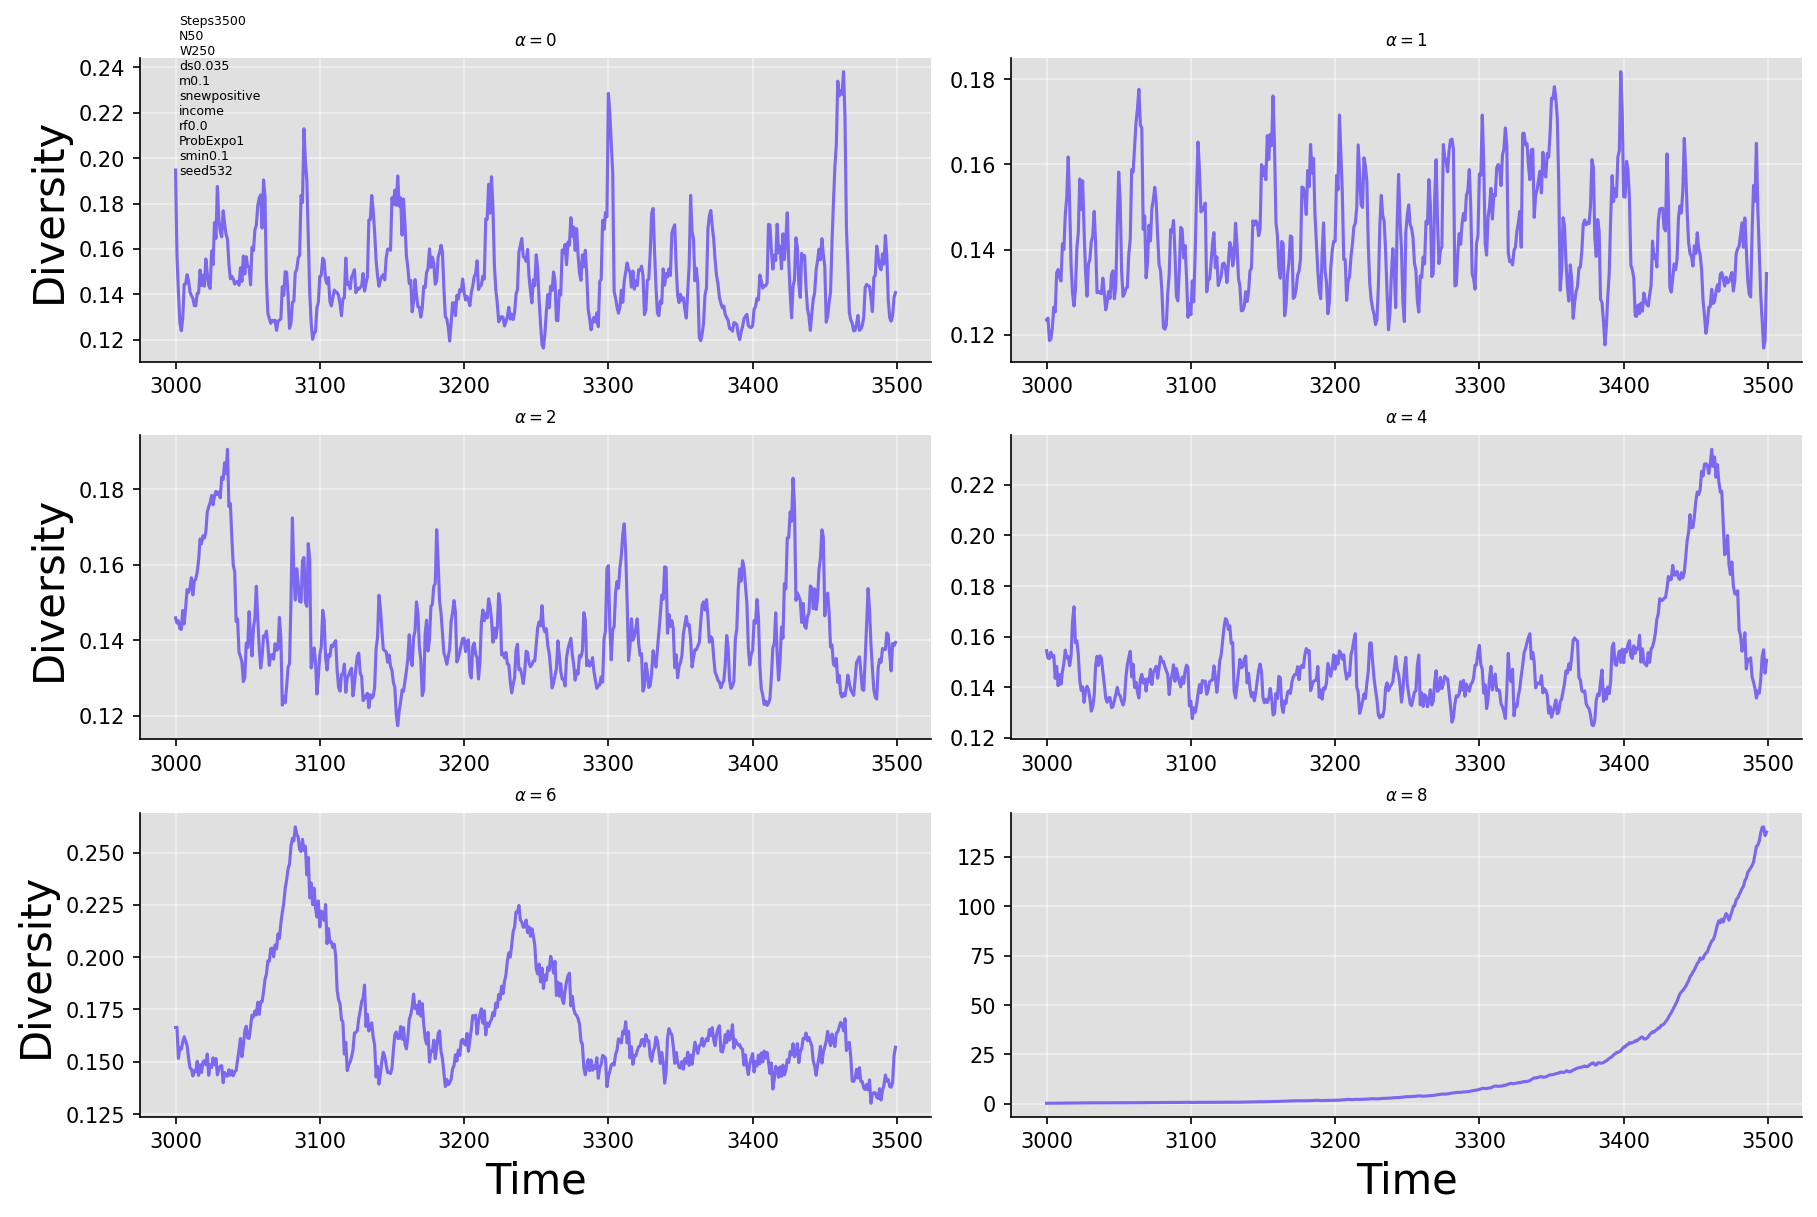

In [3]:
# -- Exponent investigation (alpha) --
# plotter.plot_multiple_alpha(group_name_list_prob_expo, same_plot=False)
# plotter.plot_alpha_frequency(group_name_list_prob_expo)
# plotter.plot_ds_power_spectrum(group_name_list_prob_expo)
# plotter.plot_min_max_vs_alpha(group_name_list_alpha_arr[:-1], data_name="salary")
# plotter.plot_min_max_vs_alpha(group_name_list_alpha_arr[:-1], data_name="mu")
plotter.plot_diversity_multiple_alpha(group_name_list_prob_expo)

In [ ]:
# -- Mutation size investigation -- 
# plotter.plot_multiple_m(group_name_list_mutation, same_plot=True)
# plotter.plot_m_frequency(group_name_list_mutation)
# plotter.plot_m_power_spectrum(group_name_list_mutation)
plotter.plot_min_max_vs_m(group_name_list_mutation_arr, data_name="salary")


In [ ]:
# -- ds investigation --

plotter.plot_multiple_ds(group_name_list_ds, same_plot=False)
plotter.plot_ds_frequency(group_name_list_ds)
plotter.plot_ds_power_spectrum(group_name_list_ds)

In [ ]:
plotter.plot_multiple_s_min(group_name_list_salary_min)

In [ ]:
plotter.plot_N_var_W_const(group_name_list_N_var_W_const)
plotter.plot_N_W_ratio(group_name_list_N_W_ratio)
plotter.plot_N_const_W_var(group_name_list_N_const_W_var)